---
1.Import libraries
---

In [28]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to hyperparameter tunning 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# # to compute distances
from scipy.spatial.distance import pdist, cdist

# to find neighbors in clustering
from sklearn.neighbors import NearestNeighbors

# to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform DBSCAN clustering
from sklearn.cluster import DBSCAN

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#  to perform PCA
from sklearn.decomposition import PCA

---
2.Data preprocessing
---

In [29]:
#Read data
data = pd.read_excel(r"D:\Bài tập code UEH\Project cá nhân\Stock\full_stock_data.xlsx")

In [30]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

---
3.Data overview
---

In [31]:
df.shape

(1500, 12)

- The dataset has 1500 rows and 11 columns

In [32]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   symbol                                               1500 non-null   object 
 1   volume                                               1500 non-null   float64
 2   Volatility                                           1500 non-null   float64
 3   Net Profit Margin (%)                                1500 non-null   float64
 4   ROE (%)                                              1500 non-null   float64
 5   ROA (%)                                              1500 non-null   float64
 6   Outstanding Share (Mil. Shares)                      1500 non-null   int64  
 7   Market Capital (Bn. VND)                             1500 non-null   int64  
 8   EPS (VND)                                            1500 non-null  

- Symbol, sector are of object type & rest are either float or integer type 

In [33]:
# Rename the columns for easier reference in df
df.rename(columns={"Net Profit Margin (%)": "PM"}, inplace=True)
df.rename(columns={"ROE (%)": "ROE"}, inplace=True)
df.rename(columns={"ROA (%)": "ROA"}, inplace=True)
df.rename(columns={"Outstanding Share (Mil. Shares)": "shares"}, inplace=True)
df.rename(columns={"Market Capital (Bn. VND)": "mcapital"}, inplace=True)
df.rename(columns={"EPS (VND)": "EPS"}, inplace=True)
df.rename(columns={"Net cash inflows/outflows from operating activities": "NCF"}, inplace=True)


In [34]:
# Rename the columns for easier reference in data
data.rename(columns={"Net Profit Margin (%)": "PM"}, inplace=True)
data.rename(columns={"ROE (%)": "ROE"}, inplace=True)
data.rename(columns={"ROA (%)": "ROA"}, inplace=True)
data.rename(columns={"Outstanding Share (Mil. Shares)": "shares"}, inplace=True)
data.rename(columns={"Market Capital (Bn. VND)": "mcapital"}, inplace=True)
data.rename(columns={"EPS (VND)": "EPS"}, inplace=True)
data.rename(columns={"Net cash inflows/outflows from operating activities": "NCF"}, inplace=True)

In [35]:
# Descreptive statics
summary = df.describe()
print(summary)

             volume   Volatility           PM          ROE          ROA  \
count  1.500000e+03  1500.000000  1500.000000  1500.000000  1500.000000   
mean   4.476704e+05     0.518091     0.009391     0.082269     0.025511   
std    2.006006e+06     0.259586     2.246940     0.544212     0.305656   
min    0.000000e+00     0.000000   -40.788367    -5.076576    -9.584445   
25%    0.000000e+00     0.340196     0.003667     0.010919     0.003027   
50%    7.000000e+02     0.483244     0.032147     0.064473     0.023238   
75%    4.335000e+04     0.667166     0.108111     0.131862     0.066021   
max    2.433882e+07     1.509476    48.318698    11.496791     4.578543   

             shares      mcapital           EPS           P/E           NCF  
count  1.500000e+03  1.500000e+03   1500.000000  1.500000e+03  1.500000e+03  
mean   1.422165e+08  4.434273e+12   1255.904743  8.296097e+02  2.821509e+11  
std    5.324280e+08  2.361773e+13   4250.036493  2.984102e+04  4.013463e+12  
min    0.000

- Market capitalization and the number of shares cannot be zero for publicly listed companies. This is likely a data issue, so we see the data again.

In [36]:
print(df[df["shares"] == 0])

    symbol  volume  Volatility        PM       ROE       ROA  shares  \
705    LQN     0.0    1.015462 -0.650079  0.363213 -0.061273       0   

     mcapital  EPS  P/E         NCF                    sector  
705         0  0.0  0.0  5389623836  Construction & Materials  


In [37]:
print(df[df["mcapital"] == 0])

    symbol  volume  Volatility        PM       ROE       ROA  shares  \
705    LQN     0.0    1.015462 -0.650079  0.363213 -0.061273       0   

     mcapital  EPS  P/E         NCF                    sector  
705         0  0.0  0.0  5389623836  Construction & Materials  


- It can be observed that only one data row has both market capitalization and the number of shares equal to zero, which corresponds to the stock code LQN. We remove this data row.

In [38]:
df = df[~((df["mcapital"] == 0) & (df["shares"] == 0))]

In [39]:
data = data[~((data["mcapital"] == 0) & (data["shares"] == 0))]


In [40]:
# Check duplicate 
df.duplicated().sum()

0

- There are no duplicate records 

In [41]:
# Check null values 
missdata = df.isnull().sum()
miss= (missdata/len(df))*100
miss


symbol        0.0
volume        0.0
Volatility    0.0
PM            0.0
ROE           0.0
ROA           0.0
shares        0.0
mcapital      0.0
EPS           0.0
P/E           0.0
NCF           0.0
sector        0.0
dtype: float64

- There are no null or missing values in the dataset

In [42]:
#'symbol', 'sector' is an abbreviation to identify the stocks, and is not required for further analysis
df = df.drop(columns=['symbol','volume','Volatility','sector'])  
#df = df.drop(columns=['symbol','sector'])  

---
4.EDA
---

In [43]:
# Function draw Histogram and Boxplot

def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=50):
    
    # Calculate mean & median 
    mean_val = np.mean(data[feature])
    median_val = np.median(data[feature])
    
    # Create subplot 
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2, 
        sharex=True, 
        gridspec_kw={"height_ratios": (0.2, 0.8)},  
        figsize=figsize
    )

    # Draw Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")

    # Draw Histogram
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color="blue")

    # Draw Mean and Median
    ax_hist.axvline(mean_val, color="green", linestyle="--", label="Mean")
    ax_hist.axvline(median_val, color="black", linestyle="-", label="Median")

    ax_hist.legend()
    plt.show()


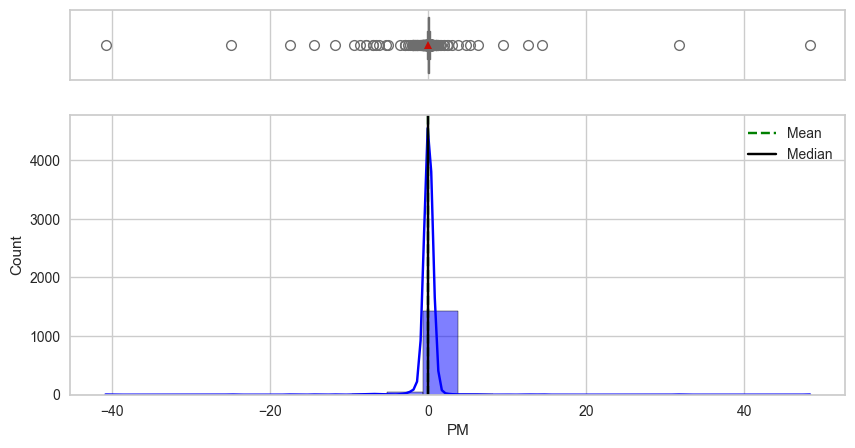

In [18]:
# Draw for profit margin
histogram_boxplot(df, "PM", kde=True, bins=20)

- Profit margin has a somewhat normal distribution with a lot of negative and positive outliers

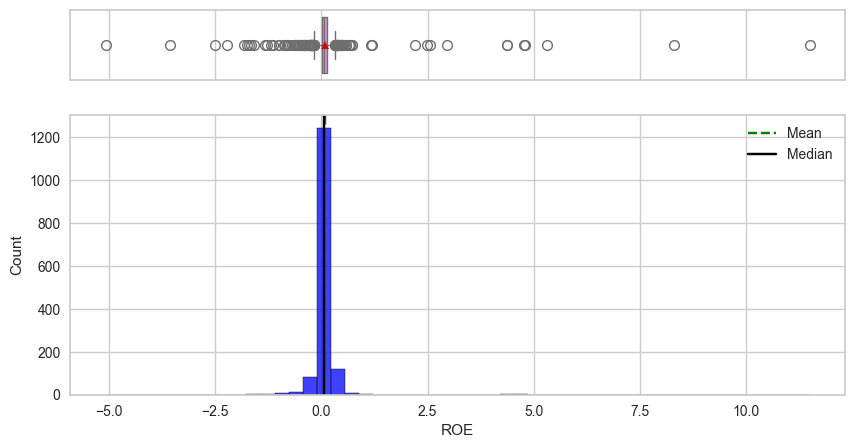

In [19]:
# Draw for ROE
histogram_boxplot(df, "ROE")

- The distribution of ROE is highly concentrated around zero, is relatively skewed with numerous outliers on both the negative and positive sides

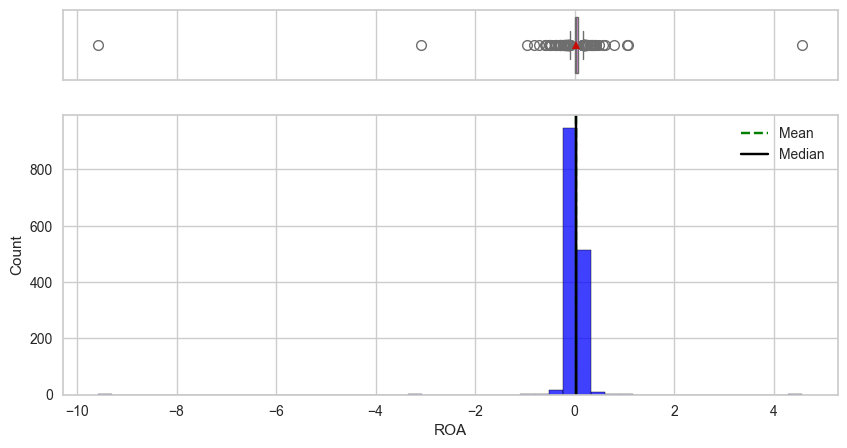

In [20]:
# Draw for ROA
histogram_boxplot(df, "ROA")

- The distribution of ROA is highly concentrated around zero, is relatively skewed with numerous outliers on both the negative and positive sides

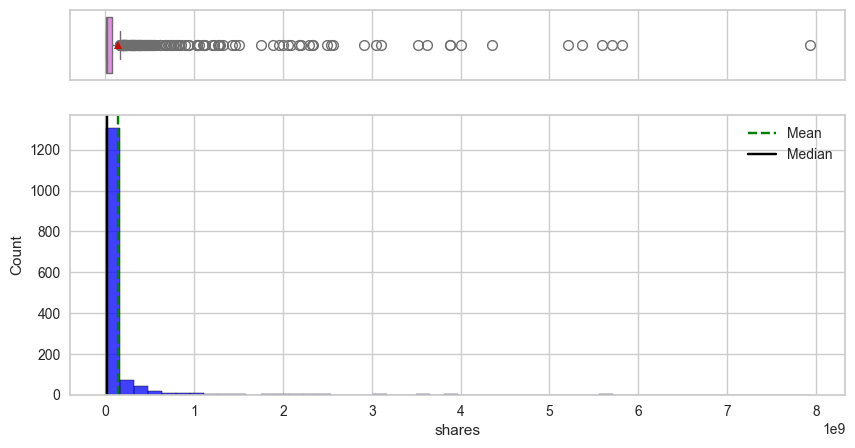

In [21]:
# Draw for shares
histogram_boxplot(df, "shares")

- Shares (Outstanding Share) is right skewed with several positive outliers and the mean is noticeably higher than the median. This suggesting that the distribution is strongly influenced by a few large values.


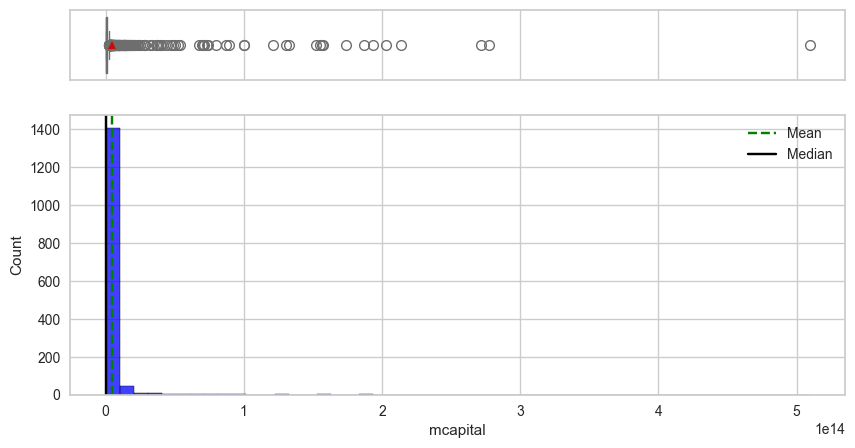

In [22]:
# Draw for mcapital
histogram_boxplot(df, "mcapital")

- mcapital (Market Capital) is right skewed with several positive outliers and the mean is noticeably higher than the median. This suggesting that the distribution is strongly influenced by a few large values.


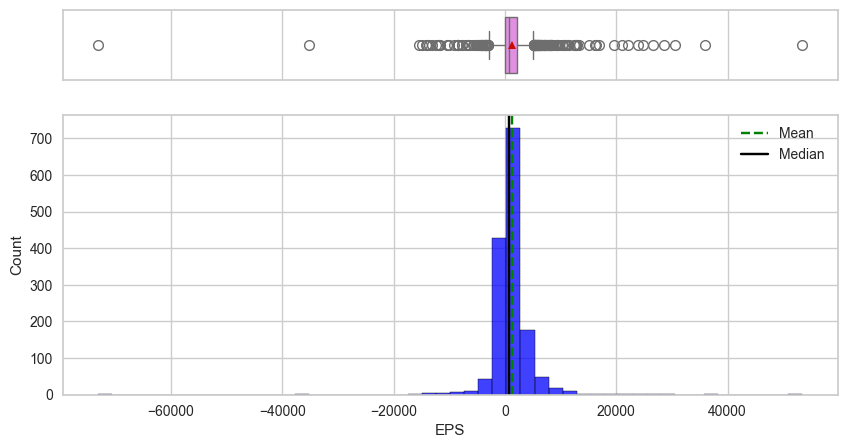

In [23]:
# Draw for EPS
histogram_boxplot(df, "EPS")

- EPS is slightly left skewed with several positive outliers

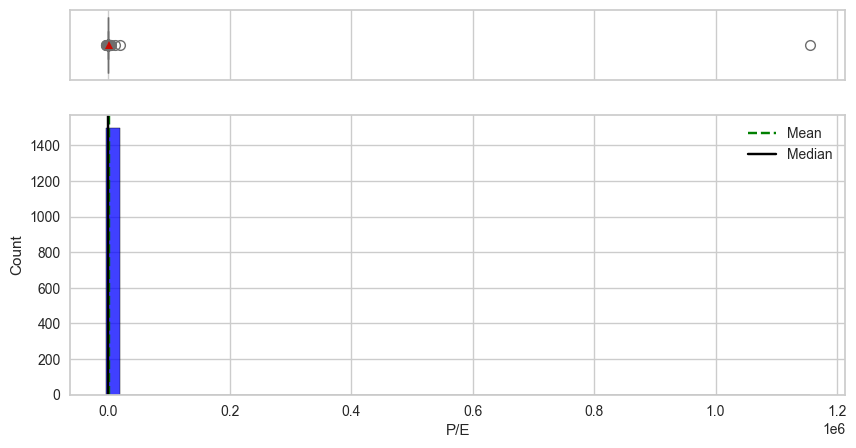

In [24]:
# Draw for P/E
histogram_boxplot(df, "P/E")

- P/E ratio is right skewed with several positive and negative outliers. 

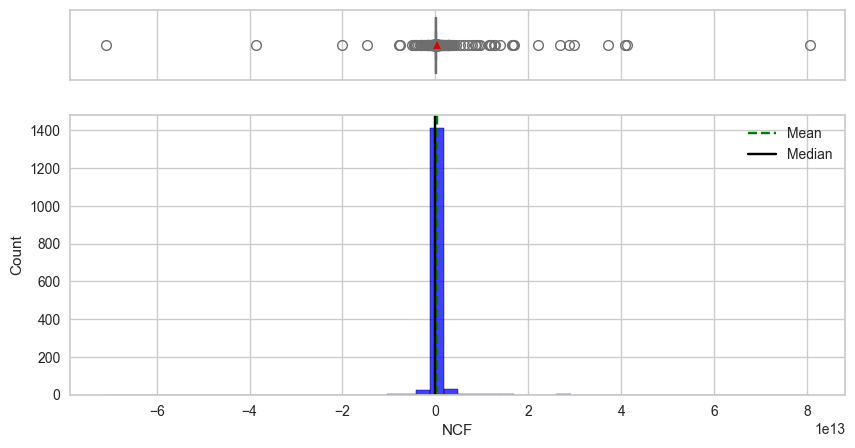

In [51]:
# Draw for Net Cash Flow
histogram_boxplot(df, "NCF")

- The NCF (Net Cash Flow) is skewed with significant outliers on both the positive and negative sides.

- Correlation matrix

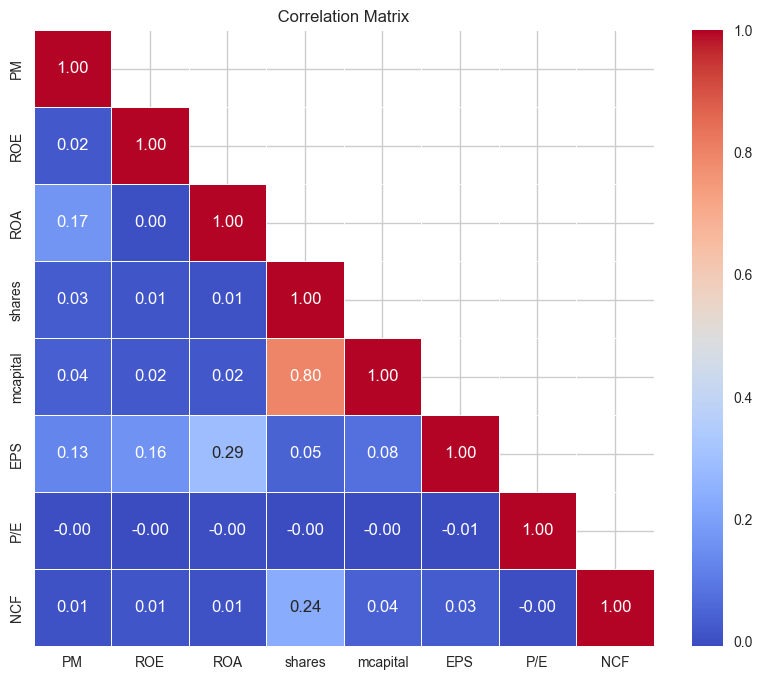

In [44]:
# Correlation matrix
corr_matrix = df.corr()

# Create mask to hide upper, keep Diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # k=1 để giữ đường chéo

# Draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(" Correlation Matrix ")
plt.show()

- mcapital (market capitalization) has a high correlation (0.80) with shares (number of shares)
- ROA (Return on Assets) has a moderate correlation (0.29) with EPS (Earnings per Share), (Net Cash Flow) with a correlation of 0.24 
- The others financial variables in this dataset exhibit weak correlations.

---
3.Data preprocessing for clustering
---

In [45]:
#  Scaling the data to bring it to the same scale by StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [46]:
# Dimenssion reduction by PCA
pca = PCA()
pca.fit(X_scaled)

# Get eigenvalues 
eigenvalues = pca.explained_variance_

# Dettermine number of components having eigenvalue >= 1
n_components_optimal = np.sum(eigenvalues >= 1)

print(f"Maxium number of component (eigenvalue >= 1): {n_components_optimal}")


Maxium number of component (eigenvalue >= 1): 4


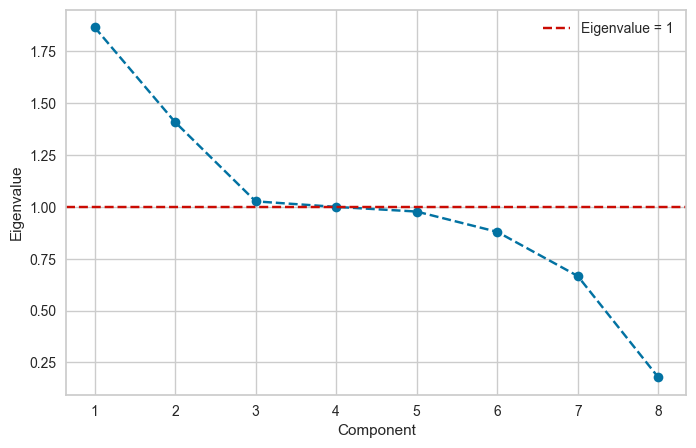

In [47]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()


In [48]:
pca_optimal = PCA(n_components=n_components_optimal)
X_pca = pca_optimal.fit_transform(X_scaled)

print(f"Data after dimenssion reduction: {X_pca.shape}")


Data after dimenssion reduction: (1499, 4)


In [50]:
# Turn into dataframe
sub_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3','PC4'])

---
3.Kmeans clustering
---

In [51]:
# Create a data copy for Kmeans clustering
sub_df1 = sub_df.copy()
data1 = data.copy()
df1 = df.copy()

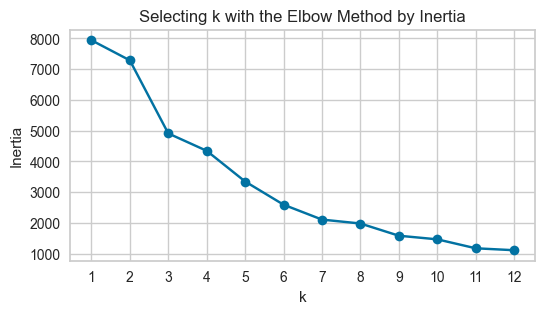

In [52]:
## Tính toán Inertia theo các giá trị của tham số k
nbClusters = range(1, 13)
scores = []
for k in nbClusters:
    model = KMeans(n_clusters = k)
    model.fit(sub_df1)
    scores.append(model.inertia_)
##  Biểu diễn trực quan Inertia --> xác định elbow
plt.figure(figsize = (6, 3))
plt.plot(nbClusters, scores, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Inertia')
plt.title('Selecting k with the Elbow Method by Inertia')

plt.show()

Consider K = 3 or K = 4 

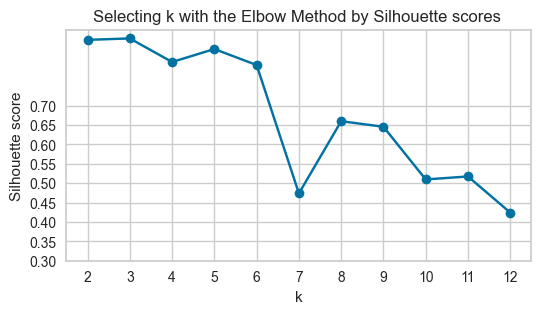

Best parameters: k = 3


In [53]:
## Analyze  Silhouette scores by parameter k
nbClusters  = range(2, 13) 
silhouettes = []
for k in nbClusters:
    model = KMeans(n_clusters = k)
    model.fit(sub_df1)
    silhouettes.append(silhouette_score(sub_df1, model.fit_predict(sub_df1), metric = 'euclidean'))

plt.figure(figsize = (6, 3))
plt.plot(nbClusters, silhouettes, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Silhouette score')
plt.yticks(np.arange(0.3, 0.75, 0.05))
plt.title('Selecting k with the Elbow Method by Silhouette scores ')

plt.show()
print(f'Best parameters: k = {nbClusters[np.argmax(silhouettes)]}')

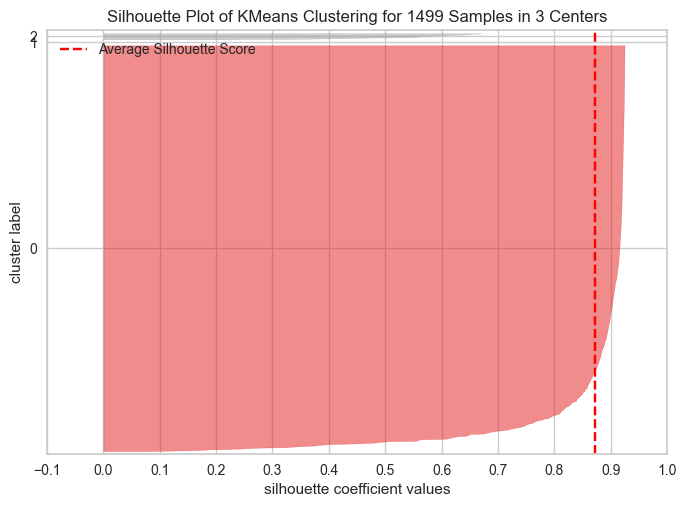

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1499 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(sub_df1)    
visualizer.show()

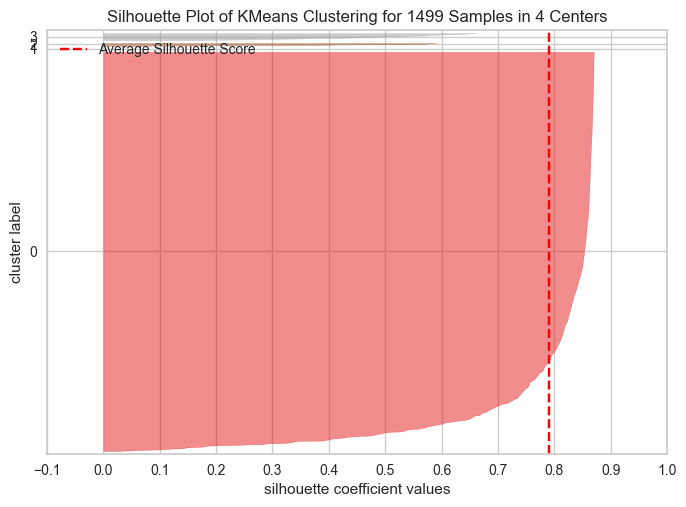

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1499 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(sub_df1)    
visualizer.show()

K = 3 là con số hợp lý nhất

In [ ]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(sub_df)


KMeans(n_clusters=3, random_state=0)

In [69]:
silhouette_score(sub_df1, kmeans.fit_predict(sub_df), metric = 'euclidean')

0.8405649815916891

In [57]:
data1['K_means_segments'] = kmeans.labels_
df1['K_means_segments'] = kmeans.labels_

In [58]:
cluster_profile1 = df1.groupby('K_means_segments').mean()

In [59]:
cluster_profile1['count_in_each_segments'] = data1.groupby('K_means_segments')['symbol'].count().values

In [60]:
cluster_profile1

,PM,ROE,ROA,shares,mcapital,EPS,P/E,NCF,count_in_each_segments
K_means_segments,,,,,,,,,
0,-0.005717,0.046050,0.021068,8.881393e+07,2.082323e+12,1036.890850,853.580084,1.101058e+11,1457
1,0.314830,0.175680,0.052740,3.629309e+09,1.567171e+14,3629.662494,36.786963,1.148768e+13,23
2,0.832870,2.731845,0.337890,2.361561e+07,6.827241e+11,15243.416285,-5.147116,-7.472819e+10,19


In [47]:
df_cluster_1 = data1[data1["K_means_segments"] == 1][["symbol", "K_means_segments","sector"]]

# 🔹 In kết quả
print(df_cluster_1)

     symbol  K_means_segments                             sector
6       ABB                 1                              Banks
13      ACB                 1                              Banks
134     BSR                 1                Oil & Gas Producers
259     CTG                 1                              Banks
316     DIG                 1  Real Estate Investment & Services
382     DXG                 1  Real Estate Investment & Services
393     EIB                 1                              Banks
423     FPT                 1       Software & Computer Services
435     GAS                 1       Gas, Water & Multi-utilities
444     GEX                 1  Electronic & Electrical Equipment
466     GVR                 1                          Chemicals
472     HAG                 1                     Food Producers
498     HDB                 1                              Banks
564     HSG                 1         Industrial Metals & Mining
703     LPB              

In [61]:
df_cluster_0 = data1[data1["K_means_segments"] == 0][["symbol", "K_means_segments","sector"]]
print(df_cluster_0)

     symbol  K_means_segments                            sector
0       A32                 0                    Personal Goods
1       AAA                 0                         Chemicals
2       AAM                 0                    Food Producers
3       AAS                 0                Financial Services
4       AAT                 0                    Personal Goods
...     ...               ...                               ...
1495    XPH                 0                    Personal Goods
1496    YBC                 0          Construction & Materials
1497    YBM                 0                            Mining
1498    YEG                 0                             Media
1499    YTC                 0  Health Care Equipment & Services

[1457 rows x 3 columns]


In [62]:
df_cluster_2 = data1[data1["K_means_segments"] == 2][["symbol", "K_means_segments","sector"]]
print(df_cluster_2)

     symbol  K_means_segments                               sector
60      ATG                 2                               Mining
71      BCA                 2           Industrial Metals & Mining
222     CMF                 2                       Food Producers
306     DHB                 2                            Chemicals
407     FBC                 2               Industrial Engineering
429     FTI                 2                  Automobiles & Parts
451     GLC                 2                               Mining
528     HLB                 2                            Beverages
687     LGM                 2                       Personal Goods
699     LMH                 2    Real Estate Investment & Services
904     PLO                 2            Industrial Transportation
1004    RAL                 2  Household Goods & Home Construction
1111    SLS                 2                       Food Producers
1229    TMB                 2                               Mi

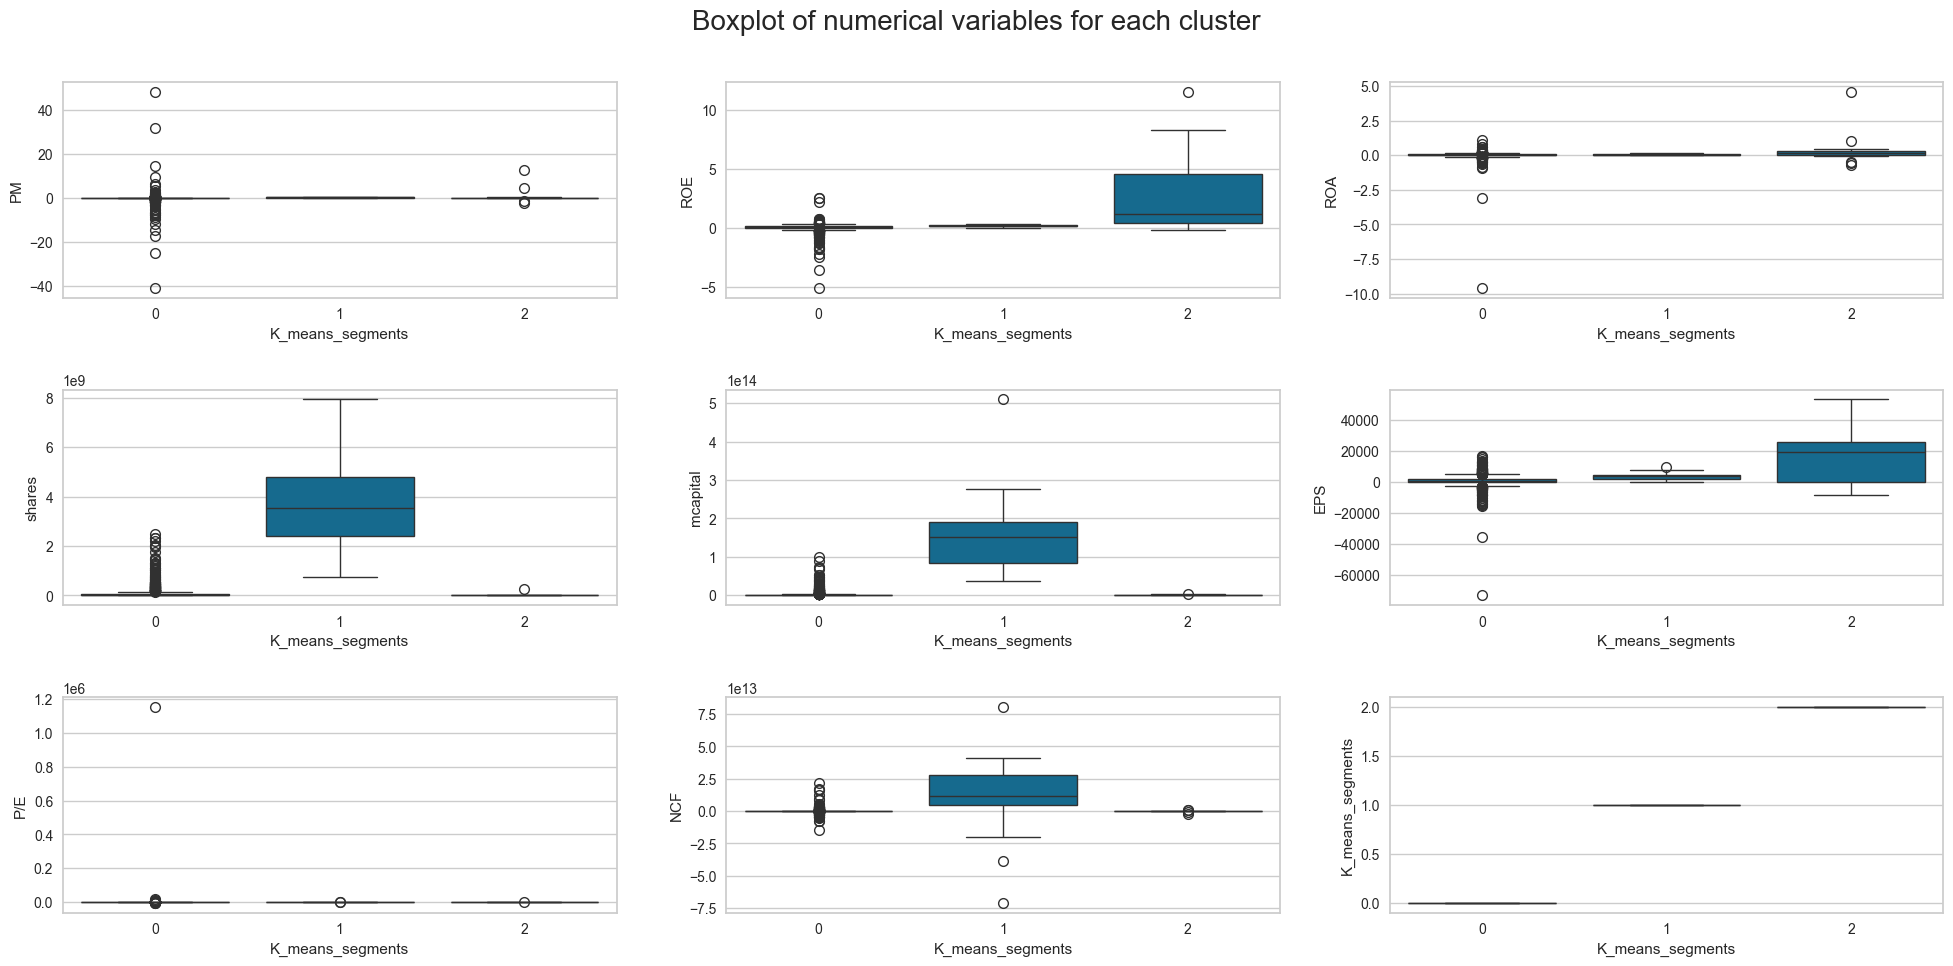

In [63]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(3, 3,  figsize=(20, 10))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(3):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=df1[num_cols[counter]],x=df1['K_means_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)


### Cluster 0
This segment exhibits a high concentration of values near zero across most financial metrics.
Market Capitalization (mcapital), Net Cash Flow (NCF), and Shares Outstanding are significantly low, with numerous values approaching zero.
Earnings Per Share (EPS) and Return on Equity (ROE) display considerable dispersion, but the majority of values are negative or close to zero.
-> Firms in this cluster likely represent small-scale enterprises or underperforming companies with weak financial stability.
### Cluster 1
This segment has higher Market Capitalization and Net Cash Flow, with substantial dispersion, indicating the presence of larger firms
Shares Outstanding is also significantly higher, implying that companies in this cluster are publicly traded firms with substantial market capitalization. EPS values are moderate, neither excessively high nor notably low.
However, ROE and ROA do not show significant divergence from other clusters, suggesting that asset and capital utilization efficiency remains suboptimal.
-> This cluster likely consists of large corporations with strong financial backing but room for operational improvements.
### Cluster 2
This segment exhibits the highest EPS and ROE among the three clusters, reflecting firms with superior profitability.
Market Capitalization and Net Cash Flow are also elevated, but with lower dispersion, indicating medium company which have a superior performance in  that year. ROA is significantly higher than in other clusters, suggesting that firms in this category demonstrate superior asset utilization efficiency.
-> Companies in this segment can be classified as medium company which have high-performing and growth-oriented businesses.

---
4.DBSCAN clustering
---

In [64]:
# Create a copy for DBSCAN clustering
sub_df2 = sub_df.copy()
data2 = data.copy()
df2 = df.copy()

In [65]:
# Build a NearestNeighbors model with k=4
neighbors = 4
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(sub_df2)

# Distances matrix: (N, k)
distances, indices = nbrs.kneighbors(sub_df2)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

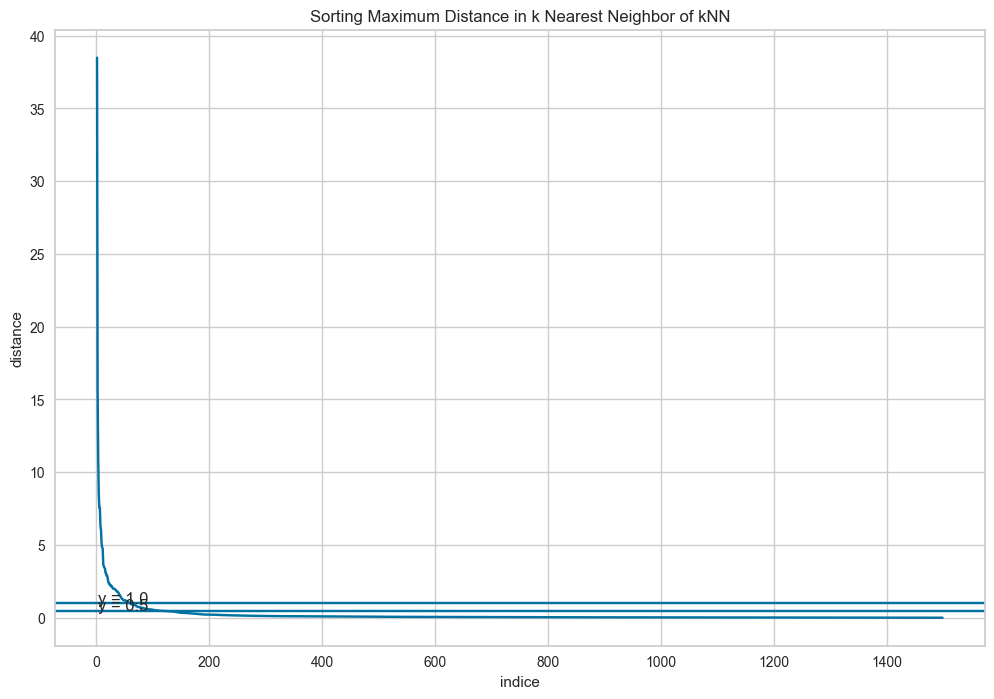

In [66]:
# Draw a chart to show Maximum Distance in k Nearest Neighbor of kNN
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.5)
plt.text(2, 0.5, 'y = 0.5', fontsize=12)
plt.axhline(y=1.0)
plt.text(2, 1.0, 'y = 1.0', fontsize=12)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

In [67]:
# Define function for scoring (Silhouette Score)
def dbscan_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    unique_labels = set(labels)
    if len(unique_labels) > 1 and -1 in unique_labels:
        unique_labels.remove(-1)  # Remove noise label (-1)
    if len(unique_labels) < 2:
        return -1  # Không thể tính silhouette nếu chỉ có 1 cụm
    return silhouette_score(X, labels)

# Create a parameter tunning
param_dist = {
    "eps": uniform(0.5, 1.0),  # eps từ 0.1 đến 2.1
    "min_samples": randint(5, 10)  # min_samples từ 2 đến 5
}

# Use RandomizedSearchCV 
random_search = RandomizedSearchCV(
    DBSCAN(), param_distributions=param_dist, n_iter=20, scoring=dbscan_scorer, cv=3, random_state=42, n_jobs=-1
)
random_search.fit(sub_df2)

# Print best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)




Best parameters: {'eps': 0.950499251969543, 'min_samples': 6}


In [70]:
# Use DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
sub_df2["Cluster"] = best_dbscan.fit_predict(sub_df2)

In [77]:
silhouette_score(sub_df2, best_dbscan.fit_predict(sub_df), metric = 'euclidean')

0.8553650187388069

In [71]:
data2['DBSCAN_segments'] = best_dbscan.labels_
df2['DBSCAN_segments'] =  best_dbscan.labels_

In [72]:
cluster_profile2 = df2.groupby('DBSCAN_segments').mean()


In [73]:
cluster_profile2['count_in_each_segments'] = data2.groupby('DBSCAN_segments')['symbol'].count().values

In [74]:
cluster_profile2

,PM,ROE,ROA,shares,mcapital,EPS,P/E,NCF,count_in_each_segments
DBSCAN_segments,,,,,,,,,
-1,-0.128284,0.807048,-0.150021,1.463903e+09,6.283484e+13,1414.373571,19596.844662,4.514659e+12,59
0,0.015489,0.052378,0.032764,8.816279e+07,2.044552e+12,1250.284079,61.250453,1.089278e+11,1440


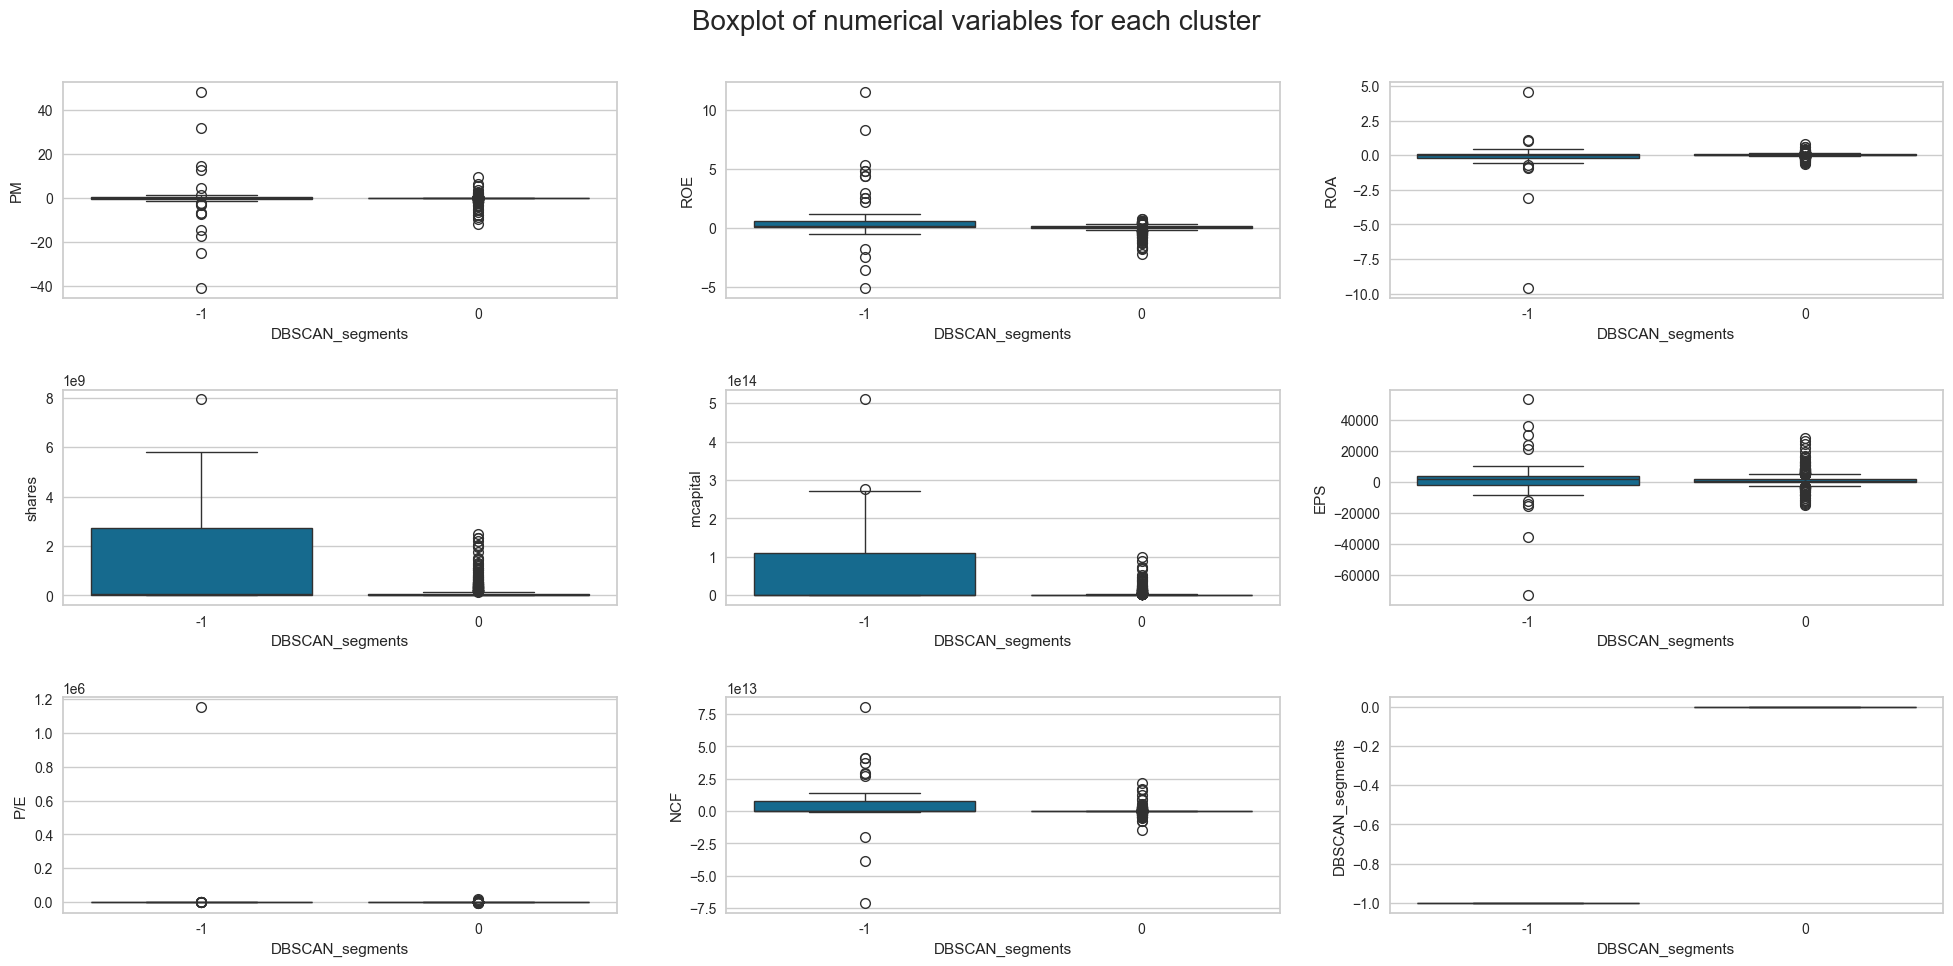

In [76]:
# Draw boxplot of numerical variables for each cluster
num_cols2 = df2.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(3, 3,  figsize=(20, 10))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(3):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=df2[num_cols2[counter]],x=df2['DBSCAN_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)

### Cluster 0
This segment exhibits relatively low dispersion across most financial metrics, indicating stability in business operations.
Market Capitalization (mcapital), Net Cash Flow (NCF), and Shares Outstanding are significantly lower than in Cluster -1, with most values concentrated near zero. Earnings Per Share (EPS) and Return on Equity (ROE) show minimal variation, with fewer extreme values, suggesting consistent but modest financial performance. Profitability metrics such as Profit Margin (PM) and Return on Assets (ROA) remain stable, with limited outliers.
-> Firms in this cluster are likely small to medium-sized enterprises with stable but moderate financial performance, characterized by lower risk exposure and predictable cash flows.

### Cluster -1
This segment exhibits substantial dispersion across key financial indicators, with a high presence of extreme values.
Market Capitalization (mcapital) and Shares Outstanding display significant variability, indicating the presence of both large corporations and firms with inconsistent performance. EPS values fluctuate widely, with both highly positive and extremely negative earnings, suggesting that firms in this cluster experience substantial volatility in profitability. Net Cash Flow (NCF) varies considerably, with several firms exhibiting large inflows and outflows, reflecting unstable financial management. The Price-to-Earnings (P/E) ratio contains numerous outliers, implying potential overvaluation or significant speculative activity in stock pricing.
-> Companies in this cluster likely include both large corporations with aggressive financial strategies and high-risk firms experiencing significant volatility in earnings and cash flow.